In [100]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.sandbox.regression.predstd import wls_prediction_std


import statsmodels.api as sm

%matplotlib inline


In [101]:

file = "All_data_KJ_Thesis.xlsx"
df = pd.read_excel(file,index = 'Food')
df

,Category,Food,Test Date,Weight (g/MJ),Protein (g/MJ),Fat (g/MJ),AvCHO (g/MJ),Sugar (g/MJ),Fibre (g/MJ),GI (%),GL (g/MJ),GS (%),FII (%),Table Name,En-tête
0,Glucose,Glucose (Glucodin Energy Powder),2005.0,59,0,0,59,59,0,100,59,100,100,Page 17 table 1,Données
1,Dairy Products,Cream cheese (Coles),2003.0,68,6,24,3,2,0,0,0,4,18,Page 17 table 1,Données
2,Dairy Products,93% Fat-free cheddar cheese (Dairy Farmers),2003.0,119,41,8,1,1,0,0,0,6,20,Page 17 table 1,Données
3,Dairy Products,Full cream milk (Dairy Farmers),1999.0,368,11,14,17,17,0,31,5,12,24,Page 17 table 1,Données
4,Dairy Products,Cheddar cheese (Coles),NaN,59,15,21,0,0,0,0,0,39,33,Page 17 table 1,Données
5,Dairy Products,1% Fat milk (Dairy Farmers),2005.0,558,20,6,27,27,0,29,8,16,34,Page 17 table 1,Données
6,Dairy Products,Reduced-fat cottage cheese (Dairy Farmers),2006.0,234,29,10,7,7,0,10,1,9,40,Page 17 table 1,Données
7,Dairy Products,Low-fat processed cheese slice (Kraft Foods Ltd),2003.0,154,36,4,15,15,0,10,2,14,42,Page 17 table 1,Données
8,Dairy Products,Low-fat cottage cheese (Bulla Dairy Foods),2007.0,264,30,6,16,14,0,10,2,4,52,Page 17 table 1,Données
9,Dairy Products,Skim milk (Dairy Farmers),2001.0,690,25,1,33,33,0,29,9,25,60,Page 17 table 1,Données


In [102]:
#Selectind the df to create the X and Y matrices
X = df[['Protein (g/MJ)','AvCHO (g/MJ)','Fibre (g/MJ)']]
Y = df[['FII (%)']]



In [103]:
#Linear regression on X and Y - see here for example http://www.statsmodels.org/stable/examples/notebooks/generated/ols.html
X_1 = sm.add_constant(X)
model = sm.OLS(Y, X_1).fit()
predictions = model.predict(X_1)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                FII (%)   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     46.82
Date:                Sat, 20 Jan 2018   Prob (F-statistic):           5.91e-20
Time:                        14:50:21   Log-Likelihood:                -512.31
No. Observations:                 121   AIC:                             1033.
Df Residuals:                     117   BIC:                             1044.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.0325      4.677      2.145      0.034       0.770      19.295
Protein (g/MJ)     0.4487      0.174      2.582      0.011       0.105       0.793
AvCHO (g/MJ)       1.1311      0.103     11.032      0.000       0.928       1.334
Fibre (g/MJ)      -1.0216      0.379     -2.698      0.008      -1.771      -0.272
==============================================================================
Omnibus:                        5.660   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                5.106
Skew:                           0.448   Prob(JB):                       0.0779
Kurtosis:                       3.457   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
print('Parameters: ', model.params)
print('Standard errors: ', model.bse)
print('Predicted values: ', model.predict())

Parameters:  const             10.032478
Protein (g/MJ)     0.448744
AvCHO (g/MJ)       1.131088
Fibre (g/MJ)      -1.021610
dtype: float64
Standard errors:  const             4.677001
Protein (g/MJ)    0.173791
AvCHO (g/MJ)      0.102531
Fibre (g/MJ)      0.378643
dtype: float64
Predicted values:  [ 76.76668096  16.11820663  29.56207317  34.19716176  16.7636388
  49.54674044  30.96367333  43.15358746  41.59221115  58.57699002
  57.05252565  41.68449099  62.49282256  57.37714775  49.75165673
  51.71087486  64.95931108  59.15427227  61.79964653  49.24819836
  52.16343097  40.12246107  71.20226206  62.11664458  46.86571201
  65.29857712  44.45714565  59.07027009  70.18065191  57.14033985
  51.72933083  67.79435354  56.14420556  54.65920738  64.07646686
  59.97538231  57.37012785  69.96550785  60.77422435  58.05247196
  72.4428283   63.59081084  54.87816346  71.88460617  62.23374667
   8.88674541  70.18446393  66.88984548  57.57825202  76.76668096
  67.01015544  70.30477389  68.58998771  

In [105]:
Xp = [0.448744, 1.131088, -1.021610 ]
Xm = X * Xp
Ym = Xm.sum(axis = 1)
Ym


0      66.734192
1       6.085728
2      19.529592
3      24.164680
4       6.731160
5      39.514256
6      20.931192
7      33.121104
8      31.559728
9      48.544504
10     47.020040
11     31.652008
12     52.460336
13     47.344662
14     39.719172
15     41.678390
16     54.926824
17     49.121786
18     51.767160
19     39.215714
20     42.130946
21     30.089978
22     61.169774
23     52.084158
24     36.833228
25     55.266090
26     34.424662
27     49.037784
28     60.148164
29     47.107854
         ...    
91     42.284356
92     64.687160
93     33.235652
94     39.635170
95     41.262746
96     26.653436
97     34.815484
98     23.384294
99     38.208748
100    24.186948
101    36.519438
102    40.022180
103    34.815484
104    36.070694
105    30.181654
106    58.801932
107    33.450796
108    54.492724
109    34.706006
110    65.712582
111    48.154940
112    39.463958
113    47.147974
114    55.966890
115    56.182034
116    59.356342
117    32.640518
118    39.3175

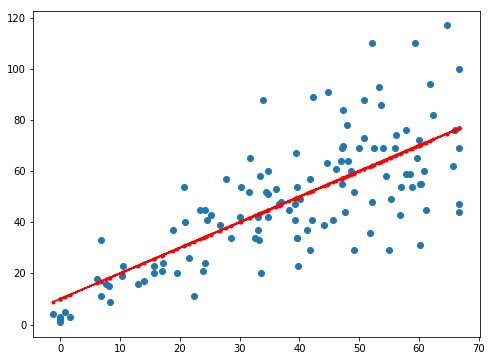

In [106]:
prstd, iv_l, iv_u = wls_prediction_std(model)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(Ym, Y, 'o', label="data")
ax.plot(Ym, model.fittedvalues, 'r--.', label="OLS")
#ax.plot(Ym, iv_u, 'r--')
#ax.plot(Ym, iv_l, 'r--')
#ax.legend(loc='best');